# Showcase Peony Project

### Import Peony Packages

In [1]:
%%capture
from PeonyPackage.PeonyDb import MongoDb
from Peony_visualization.src.peony_visualization import calculate_binary_metrics
from Peony_box.src.peony_box_model import PeonyBoxModel
from Peony_box.src.transformators.HuffPost_transformator import HuffPostTransform as transformator
from Peony_box.src.transformators.HuffPost_transformator import HuffPostTransformWordEmbeddings as word_embed_transformator
from Peony_database.src.datasets.HuffPost_news_dataset import (
    COLLECTION_NAME as HuffPost_collection_name,
    COLLECTION_ID as HuffPost_collection_id,
)
from Peony_box.src.utils import k_fold_corss_validation
from Peony_box.src.acquisition_functions.functions import entropy_sampling
from Peony_visualization.src.peony_visualization import visualize_two_auc_evolutions

### Import Other Packages

In [2]:
import numpy as np

from IPython.utils import io
from tqdm import tqdm_notebook as tqdm
from sklearn.utils import shuffle

## Create Peony Databse API

In [3]:
api = MongoDb()

## Get articles and labebls from Peony Databse

In [4]:
sport_records = api.get_record(
    collection_name=HuffPost_collection_name,
    collection_id=HuffPost_collection_id,
    label="SPORTS",
    limit=500,
)

comedy_records = api.get_record(
    collection_name=HuffPost_collection_name,
    collection_id=HuffPost_collection_id,
    label="COMEDY",
    limit=500,
)

instances = sport_records + comedy_records
labels = [sample["record"]["label"] for sample in sport_records + comedy_records]

instances, labels = shuffle(instances, labels, random_state=0)

## Create and Fit Transformator

### TF-IDF Bag-of-words based transformator

In [5]:
HuffPostTransform = transformator()
HuffPostTransform.fit(instances,labels)

100%|██████████| 1000/1000 [00:00<00:00, 131285.34it/s]

transforming data...


creating labels encoding hash map...


### Fast Text Word Embeddings

In [6]:
HuffPostWordEmbeddingsTransform = word_embed_transformator()
HuffPostWordEmbeddingsTransform.fit(instances, labels)

100%|██████████| 1000/1000 [00:00<00:00, 119546.93it/s]

transforming data...



  1%|          | 118/20405 [00:00<00:37, 546.01it/s]

creating (words -> embeddings) hash map...


100%|██████████| 20405/20405 [00:34<00:00, 596.13it/s]

creating labels encoding hash map...


## TF-IDF Bag-of-words Based K-Fold Cross Validation and Visualization

### Random Forest K-Fold Cross Validation

In [6]:
peony_model = PeonyBoxModel(HuffPostTransform)
k_fold = k_fold_corss_validation(
        peony_model.random_forest_model, HuffPostTransform, instances, labels, 10
    )

100%|██████████| 1000/1000 [00:00<00:00, 215856.31it/s]

transforming instances for k fold cross validation...



  0%|          | 0/10 [00:00<?, ?it/s]

transforming labels for k fold cross validation...
k fold cross validation...


100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


### Random Forest Results

Label 11 in mapped to 0, label 12 in mapped to 1


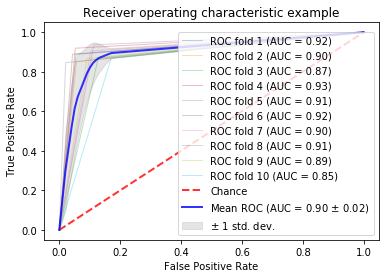

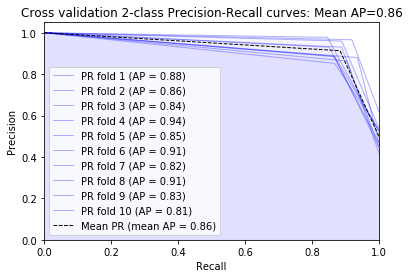

In [7]:
calculate_binary_metrics(k_fold)

### SVM K-Fold Cross Validation

In [8]:
peony_model = PeonyBoxModel(HuffPostTransform)
k_fold = k_fold_corss_validation(
        peony_model.svm_model, HuffPostTransform, instances, labels, 10
    )

100%|██████████| 1000/1000 [00:00<00:00, 167170.35it/s]

transforming instances for k fold cross validation...



  0%|          | 0/10 [00:00<?, ?it/s]

transforming labels for k fold cross validation...
k fold cross validation...


100%|██████████| 10/10 [00:45<00:00,  4.55s/it]


### SVM Results

Label 11 in mapped to 0, label 12 in mapped to 1


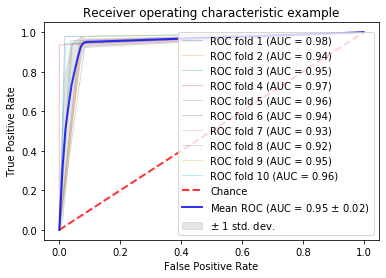

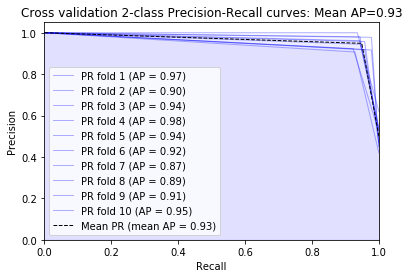

In [9]:
calculate_binary_metrics(k_fold)

### Feed Forward NN K-Fold Cross Validation

In [10]:
peony_model = PeonyBoxModel(HuffPostTransform)
k_fold = k_fold_corss_validation(
        peony_model.feed_forward_nn, HuffPostTransform, instances, labels, 10
    )

100%|██████████| 1000/1000 [00:00<00:00, 199282.75it/s]

transforming instances for k fold cross validation...



  0%|          | 0/10 [00:00<?, ?it/s]

transforming labels for k fold cross validation...
k fold cross validation...


100%|██████████| 10/10 [40:19<00:00, 241.92s/it]

starting loss (ensembles mean) is 3.715952157974243 , fitted loss (ensembles mean) is 2.76412034034729
starting loss (ensembles mean) is 3.712739944458008 , fitted loss (ensembles mean) is 2.7621750831604004
starting loss (ensembles mean) is 3.710862398147583 , fitted loss (ensembles mean) is 2.761155605316162
starting loss (ensembles mean) is 3.7066657543182373 , fitted loss (ensembles mean) is 2.7599666118621826
starting loss (ensembles mean) is 3.7118210792541504 , fitted loss (ensembles mean) is 2.7612500190734863
starting loss (ensembles mean) is 3.706815481185913 , fitted loss (ensembles mean) is 2.7627828121185303
starting loss (ensembles mean) is 3.722141981124878 , fitted loss (ensembles mean) is 2.761749267578125
starting loss (ensembles mean) is 3.714064836502075 , fitted loss (ensembles mean) is 2.7617239952087402
starting loss (ensembles mean) is 3.7123782634735107 , fitted loss (ensembles mean) is 2.7608819007873535
starting loss (ensembles mean) is 3.7085604667663574 , f

### Feed Forward NN Results

Label 11 in mapped to 0, label 12 in mapped to 1


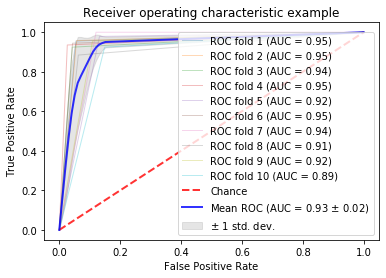

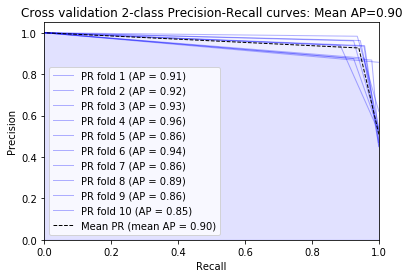

In [11]:
calculate_binary_metrics(k_fold)

### Bayesian SGLD Feed Forward NN K-Fold Cross Validation

In [10]:
peony_model = PeonyBoxModel(HuffPostTransform)
k_fold = k_fold_corss_validation(
    peony_model.bayesian_sgld_nn, HuffPostTransform, instances, labels, 10
    )

100%|██████████| 1000/1000 [00:00<00:00, 189899.22it/s]

transforming instances for k fold cross validation...



  0%|          | 0/10 [00:00<?, ?it/s]

transforming labels for k fold cross validation...
k fold cross validation...


100%|██████████| 10/10 [1:06:58<00:00, 401.83s/it]

starting loss is 0.7008684873580933 , fitted loss (samples mean) is 0.3133203685283661
starting loss is 0.6932275891304016 , fitted loss (samples mean) is 0.31330838799476624
starting loss is 0.6940743923187256 , fitted loss (samples mean) is 0.31330353021621704
starting loss is 0.6934500336647034 , fitted loss (samples mean) is 0.313324898481369
starting loss is 0.7109544277191162 , fitted loss (samples mean) is 0.3133262097835541
starting loss is 0.7000393271446228 , fitted loss (samples mean) is 0.31331947445869446
starting loss is 0.6931427717208862 , fitted loss (samples mean) is 0.3133147060871124
starting loss is 0.695830762386322 , fitted loss (samples mean) is 0.313326358795166
starting loss is 0.7051776051521301 , fitted loss (samples mean) is 0.31332141160964966
starting loss is 0.697215735912323 , fitted loss (samples mean) is 0.31331998109817505


### Bayesian SGLD Feed Forward NN Results

Label 0 in mapped to 0, label 1 in mapped to 1


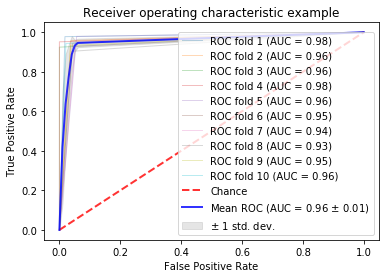

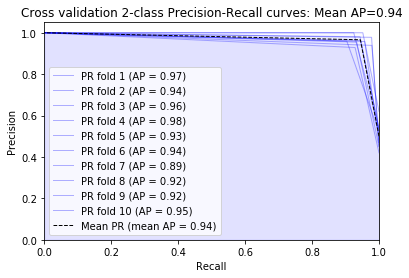

In [11]:
calculate_binary_metrics(k_fold)

## Fast Text Words Embeddings Based K-Fold Cross Validation and Visualization

### Random Forest K-Fold Cross Validation

In [7]:
peony_model = PeonyBoxModel(HuffPostTransform)
k_fold = k_fold_corss_validation(
        peony_model.random_forest_model, HuffPostWordEmbeddingsTransform, instances, labels, 10
    )

100%|██████████| 1000/1000 [00:00<00:00, 34466.27it/s]

transforming instances for k fold cross validation...



  0%|          | 0/10 [00:00<?, ?it/s]

transforming labels for k fold cross validation...
k fold cross validation...


100%|██████████| 10/10 [00:09<00:00,  1.03it/s]


### Random Forest Results

Label 11 in mapped to 0, label 12 in mapped to 1


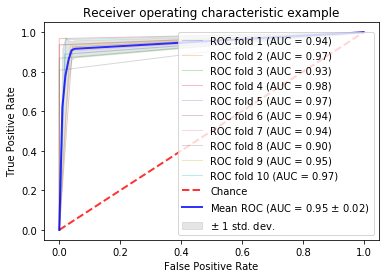

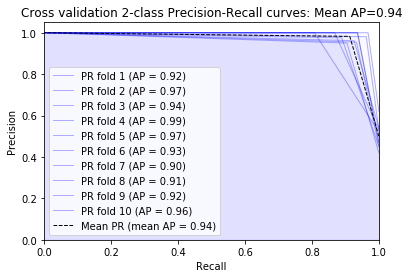

In [8]:
calculate_binary_metrics(k_fold)

### SVM K-Fold Cross Validation

In [10]:
peony_model = PeonyBoxModel(HuffPostTransform)
k_fold = k_fold_corss_validation(
        peony_model.svm_model, HuffPostWordEmbeddingsTransform, instances, labels, 10
    )

100%|██████████| 1000/1000 [00:00<00:00, 234790.86it/s]

transforming instances for k fold cross validation...



  0%|          | 0/10 [00:00<?, ?it/s]

transforming labels for k fold cross validation...
k fold cross validation...


100%|██████████| 10/10 [00:09<00:00,  1.04it/s]


### SVM Results

Label 11 in mapped to 0, label 12 in mapped to 1


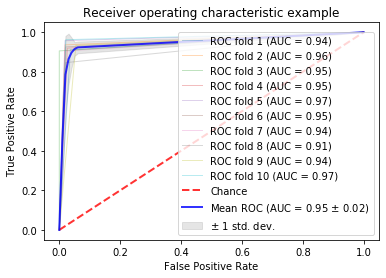

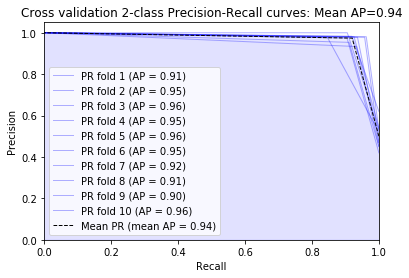

In [11]:
calculate_binary_metrics(k_fold)

### Feed Forward NN K-Fold Cross Validation

In [7]:
peony_model = PeonyBoxModel(HuffPostTransform)
k_fold = k_fold_corss_validation(
        peony_model.feed_forward_nn, HuffPostWordEmbeddingsTransform, instances, labels, 10
    )

100%|██████████| 1000/1000 [00:00<00:00, 285074.70it/s]


transforming instances for k fold cross validation...


  0%|          | 0/10 [00:00<?, ?it/s]

transforming labels for k fold cross validation...
k fold cross validation...


100%|██████████| 10/10 [02:37<00:00, 15.75s/it]

starting loss (ensembles mean) is 3.7127208709716797 , fitted loss (ensembles mean) is 2.8219330310821533
starting loss (ensembles mean) is 3.711988925933838 , fitted loss (ensembles mean) is 2.8170242309570312
starting loss (ensembles mean) is 3.720515251159668 , fitted loss (ensembles mean) is 2.8130226135253906
starting loss (ensembles mean) is 3.7188713550567627 , fitted loss (ensembles mean) is 2.809234380722046
starting loss (ensembles mean) is 3.7159807682037354 , fitted loss (ensembles mean) is 2.8099308013916016
starting loss (ensembles mean) is 3.718388795852661 , fitted loss (ensembles mean) is 2.810561418533325
starting loss (ensembles mean) is 3.7201688289642334 , fitted loss (ensembles mean) is 2.826080799102783
starting loss (ensembles mean) is 3.7093300819396973 , fitted loss (ensembles mean) is 2.826408624649048
starting loss (ensembles mean) is 3.7192296981811523 , fitted loss (ensembles mean) is 3.24985671043396
starting loss (ensembles mean) is 3.7054665088653564 , 

### Feed Forward NN Results

Label 11 in mapped to 0, label 12 in mapped to 1


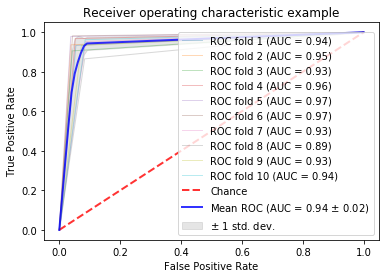

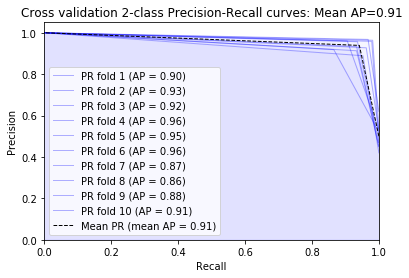

In [8]:
calculate_binary_metrics(k_fold)

### Bayestian SGLD Feed Forward NN K-Fold Cross Validation

In [7]:
peony_model = PeonyBoxModel(HuffPostTransform)
k_fold = k_fold_corss_validation(
        peony_model.bayesian_sgld_nn, HuffPostWordEmbeddingsTransform, instances, labels, 10
    )

100%|██████████| 1000/1000 [00:00<00:00, 269331.79it/s]

transforming instances for k fold cross validation...



  0%|          | 0/10 [00:00<?, ?it/s]

transforming labels for k fold cross validation...
k fold cross validation...


100%|██████████| 10/10 [01:38<00:00,  9.87s/it]

starting loss is 0.6951574683189392 , fitted loss (samples mean) is 0.3232446312904358
starting loss is 0.703654408454895 , fitted loss (samples mean) is 0.3196635842323303
starting loss is 0.7103853821754456 , fitted loss (samples mean) is 0.3224930167198181
starting loss is 0.6925843358039856 , fitted loss (samples mean) is 0.32143673300743103
starting loss is 0.709149181842804 , fitted loss (samples mean) is 0.3223288357257843
starting loss is 0.7007668614387512 , fitted loss (samples mean) is 0.3234243094921112
starting loss is 0.7052976489067078 , fitted loss (samples mean) is 0.32355594635009766
starting loss is 0.6935892105102539 , fitted loss (samples mean) is 0.3238621950149536
starting loss is 0.69383704662323 , fitted loss (samples mean) is 0.3217916190624237
starting loss is 0.7030866146087646 , fitted loss (samples mean) is 0.3207499086856842


### Bayesian SGLD Feed Forward NN Results

Label 0 in mapped to 0, label 1 in mapped to 1


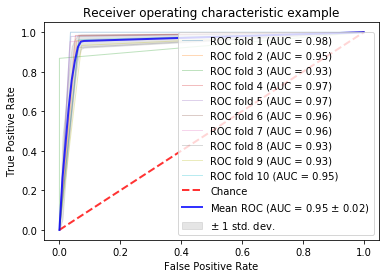

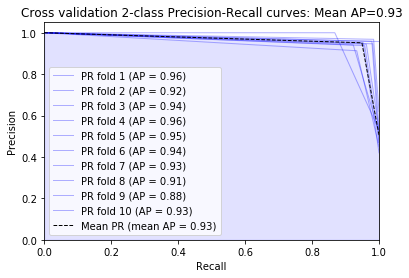

In [8]:
calculate_binary_metrics(k_fold)

## Active Learning Utils

### Initialize model -> Fit model -> Retrain model with extended training dataset

### Random Forest

In [12]:
#Initialize and fit model
peony_model = PeonyBoxModel(HuffPostTransform, active_learning_step=5)
peony_model.random_forest_model.fit(instances[100:], labels[100:])

#Get new training samples indices (random training samples indices)
indices = peony_model.random_forest_model.get_learning_samples(instances[:50])

additional_instances = [instances[index] for index in indices.tolist()]
additional_labels = [labels[index] for index in indices.tolist()]

#Retrain the model with new extended training dataset
peony_model.random_forest_model.add_new_learning_samples(additional_instances, additional_labels)

100%|██████████| 900/900 [00:00<00:00, 74800.33it/s]

transforming instances for model training...



100%|██████████| 900/900 [00:00<00:00, 1263344.58it/s]


transforming labels for model training...


100%|██████████| 5/5 [00:00<00:00, 26479.19it/s]

transforming instances for model getting learning sample...
transforming instances for model training...
transforming labels for model training...


### SVM

In [13]:
#Initialize and fit model
peony_model = PeonyBoxModel(HuffPostTransform, active_learning_step=5)
peony_model.svm_model.fit(instances[100:], labels[100:])

#Get new training samples indices (random training samples indices)
indices = peony_model.svm_model.get_learning_samples(instances[:50])

additional_instances = [instances[index] for index in indices.tolist()]
additional_labels = [labels[index] for index in indices.tolist()]

#Retrain the model with new extended training dataset
peony_model.svm_model.add_new_learning_samples(additional_instances, additional_labels)

100%|██████████| 900/900 [00:00<00:00, 188319.96it/s]

transforming instances for model training...



100%|██████████| 900/900 [00:00<00:00, 597763.04it/s]


transforming labels for model training...


100%|██████████| 50/50 [00:00<00:00, 199349.05it/s]

transforming instances for model getting learning sample...



100%|██████████| 5/5 [00:00<00:00, 15054.93it/s]

transforming instances for model training...
transforming labels for model training...


### Feed Forward NN

In [14]:
#Initialize and fit model
peony_model = PeonyBoxModel(HuffPostTransform, active_learning_step=5)
peony_model.feed_forward_nn.fit(instances[100:], labels[100:])

#Get new training samples indices (random training samples indices)
indices = peony_model.feed_forward_nn.get_learning_samples(instances[:50])

additional_instances = [instances[index] for index in indices.tolist()]
additional_labels = [labels[index] for index in indices.tolist()]

#Retrain the model with new extended training dataset
peony_model.feed_forward_nn.add_new_learning_samples(additional_instances, additional_labels)

100%|██████████| 900/900 [00:00<00:00, 465172.35it/s]

transforming instances for model training...



100%|██████████| 900/900 [00:00<00:00, 1213005.66it/s]


transforming labels for model training...


100%|██████████| 5/5 [00:00<00:00, 13289.94it/s]

transforming instances for model getting learning sample...
transforming instances for model training...
transforming labels for model training...
